Привет! Меня зовут Валерий Гриднев, я провожу ревью твоей работы. Предлагаю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-success">
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>

<div class="alert alert-danger">
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
___

<div class="alert alert-block alert-info">Валерий, привет! Спасибо за ревью) по ходу работы оставил несколько вопросов. Буду рад, если поможешь лучше разобраться)</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение-и-тестирование-моделей" data-toc-modified-id="Обучение-и-тестирование-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель случайного леса</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

Импортируем библиотеки

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.tsa.api as smt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Приступаем к знакомству с данными:

In [39]:
try:
    data = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'])
except:
    data = pd.read_csv('taxi.csv', parse_dates=['datetime'])

In [40]:
data.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Данные готовы)Приступаем к самому интересному)
</div>

Всего 2 колонки. Дату мы перобразуем в индексы. И проанализируем данные:

In [42]:
data = data.set_index('datetime')

Теперь ресемплируем данные по 1 часу и агрегируем суммой:

In [43]:
data = data.resample('H').sum()

Посмотрим на среднее количество заказов на разных промежутках времени:

Text(0, 0.5, 'Количество заказов')

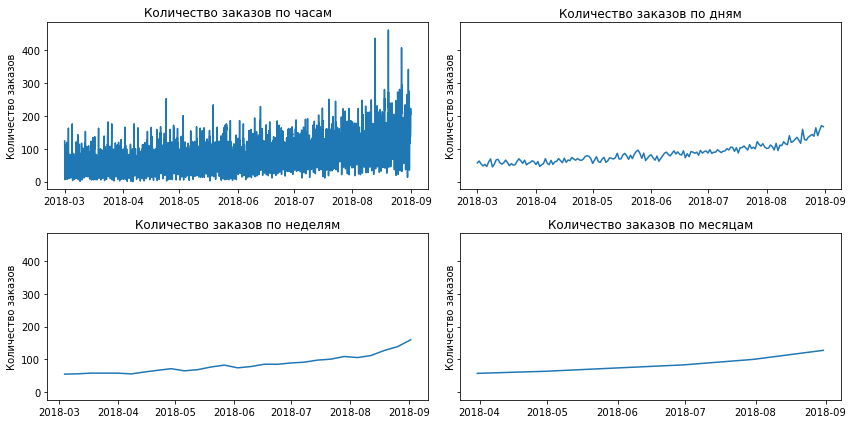

In [44]:
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(12,6))
axs[0, 0].plot(data.resample('H').mean())
axs[0, 0].set_title('Количество заказов по часам')
axs[0, 0].set_ylabel('Количество заказов')

axs[0, 1].plot(data.resample('D').mean())
axs[0, 1].set_title('Количество заказов по дням')
axs[0, 1].set_ylabel('Количество заказов')

axs[1, 0].plot(data.resample('W').mean())
axs[1, 0].set_title('Количество заказов по неделям')
axs[1, 0].set_ylabel('Количество заказов')

axs[1, 1].plot(data.resample('M').mean())
axs[1, 1].set_title('Количество заказов по месяцам')
axs[1, 1].set_ylabel('Количество заказов')

Четко виден тренд на увеличение заказов. Кривая неуклонно растет. Следовательно, предварительно выдвину предположение, что временной ряд является нестационарным. Проверим гипотезу с помощью теста Дики - Фуллера:

**Тест на стационарность**

- **Нулевая гипотеза**: ряд имеет единичный корень (не является стационарным) 

- **Альтернативная гипотеза**: ряд не имеет единичного корня (является стационарным)


In [8]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [9]:
adf_test(data.num_orders)

Results of Dickey-Fuller Test:
Test Statistic                   -3.068924
p-value                           0.028940
#Lags Used                       30.000000
Number of Observations Used    4385.000000
Critical Value (1%)              -3.431842
Critical Value (5%)              -2.862199
Critical Value (10%)             -2.567121
dtype: float64


**p-value = 0.029 < 0.05**, что позволяет отвергнуть нулевую гипотезу. Следовательно **временной ряд является стационарным**.

Теперь посмотрим, какие временные отрезки имеют наибольшую связь с "настоящим":

Построим графики автокорреляции и частичной автокорреляции: <a id='autocorr'></a>

In [10]:
def autocorrplot(y, lags=None, figsize=(15, 3), style='seaborn-white'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (1, 2)
        acf_ax = plt.subplot2grid(layout, (0, 0))
        pacf_ax = plt.subplot2grid(layout, (0, 1))
        
        plot_acf(y, lags=lags, ax=acf_ax)
        plot_pacf(y, lags=lags, ax=pacf_ax)

    return 

Графики автокорреляции выборки ресемплированной по 1 часу


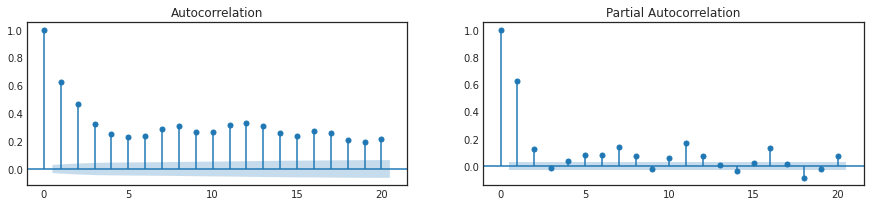

In [11]:
print('Графики автокорреляции выборки ресемплированной по 1 часу')
autocorrplot(data.num_orders, lags=20)

На графике частичной корреляции видно, что большая связь с настоящим у 1, 2, 7 и 11 лага. При этом они являются статистически значимыми. В качестве дополнительных признаков будем исользовать задержку в 1, 2, 7, 11 часа. 

Обогатим признаковое пространство. Добавим смещения и информацию о дне недели, месяце.

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Смотреть ни на что не будем?)Может как-то изучим, чтобы знать сколько лагов например делать?)
</div>

<div class="alert alert-block alert-info">Обычно так и делаю. Но так как тут нет пропущеных значений и всего 2 столбца - решил пропустить этот шаг. И, самое важное, в спринте никак не освещалась сама логика анализа временных рядов. Рассмотрели только пандовский инструментарий работы, и на этом все. Полезу на Хабр, узнаю как правильно это делать)

UPD: Мне до сих пор не очень понятно как использовать информацию из графиков автокорреляции. Правильно ли я понимаю, что на этих графиках мы ищем максимально коррелирующие с целевым признаки, которые и добавляем в качестве лагов?</div>

In [12]:
data['day'] = data.index.day
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month

In [13]:
def create_lags(data, target_col, lags_list):
    for i in lags_list:
        data['lag_' + str(i)] = data[target_col].shift(i)
    return data

In [14]:
data = create_lags(data, 'num_orders', [1, 2, 7, 11])

In [15]:
data.head()

,num_orders,day,hour,dayofweek,month,lag_1,lag_2,lag_7,lag_11
datetime,,,,,,,,,
2018-03-01 00:00:00,124,1,0,3,3,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,1,3,3,124.0,NaN,NaN,NaN
2018-03-01 02:00:00,71,1,2,3,3,85.0,124.0,NaN,NaN
2018-03-01 03:00:00,66,1,3,3,3,71.0,85.0,NaN,NaN
2018-03-01 04:00:00,43,1,4,3,3,66.0,71.0,NaN,NaN


<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Лучше это всё в функцию обернуть)
</div>

<div class="alert alert-block alert-info">Сделал)</div>

Теперь, добавим признак, который позволит модели лучше улавливать текущий внутридневной тренд. Для этого построим скользящую кривую, и для нее подберем руками значение окна: 

<div class="alert alert-block alert-info">Правильно ли я это понимаю? Мы подбираем такое значение окна, при которм лучше улавливается текущий тренд? </div>

Text(0, 0.5, 'Количество заказов')

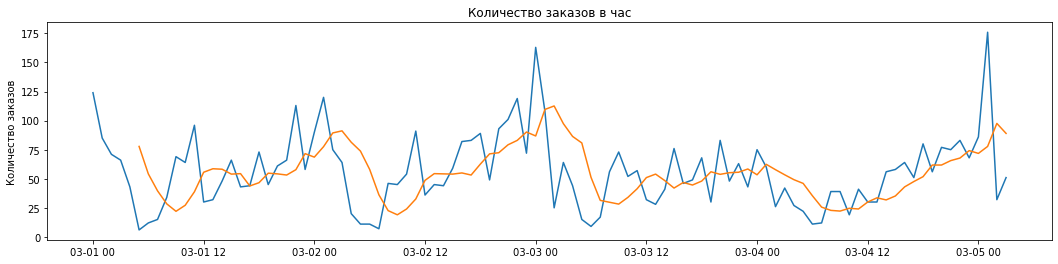

In [16]:
fig, ax = plt.subplots(figsize=(18,4))
ax.plot(data.num_orders[0:100])
ax.plot(data.num_orders.shift().rolling(5).mean()[0:100])
ax.set_title('Количество заказов в час')
ax.set_ylabel('Количество заказов')

Выберем значение окна равное 5. Добавим новый признак в датафрейм:

In [17]:
data['rolling_mean'] = data['num_orders'].shift().rolling(5).mean()

Добавим призрнак разности между предыдущим значением целевого признака и следующим перед ним:

<div class="alert alert-block alert-info"> Нужно ли делать эту процедуру дифференцирования для стационарного ряда? Или же она нужна как раз для стационаризации? </div>

In [18]:
data['diffs'] = data['lag_1'] - data['lag_2']

Избавимся от появившихся пропусков:

In [19]:
data = data.dropna()

In [20]:
data.head()

,num_orders,day,hour,dayofweek,month,lag_1,lag_2,lag_7,lag_11,rolling_mean,diffs
datetime,,,,,,,,,,,
2018-03-01 11:00:00,96,1,11,3,3,64.0,69.0,43.0,124.0,38.8,-5.0
2018-03-01 12:00:00,30,1,12,3,3,96.0,64.0,6.0,85.0,55.6,32.0
2018-03-01 13:00:00,32,1,13,3,3,30.0,96.0,12.0,71.0,58.6,-66.0
2018-03-01 14:00:00,48,1,14,3,3,32.0,30.0,15.0,66.0,58.2,2.0
2018-03-01 15:00:00,66,1,15,3,3,48.0,32.0,34.0,43.0,54.0,16.0


Посмотрим на итоговую матрицу корреляции:

In [21]:
data.corr()

,num_orders,day,hour,dayofweek,month,lag_1,lag_2,lag_7,lag_11,rolling_mean,diffs
num_orders,1.000000,0.163227,0.003134,-0.019659,0.509627,0.623498,0.464841,0.292148,0.317913,0.495323,0.183337
day,0.163227,1.000000,-0.003948,-0.013887,-0.000691,0.163232,0.163167,0.165196,0.165909,0.214152,0.000275
hour,0.003134,-0.003948,1.000000,-0.000006,-0.003443,-0.077203,-0.121347,-0.100285,-0.135289,-0.163669,0.050704
dayofweek,-0.019659,-0.013887,-0.000006,1.000000,-0.012004,-0.027371,-0.029608,-0.026916,-0.035753,-0.037648,0.002541
month,0.509627,-0.000691,-0.003443,-0.012004,1.000000,0.509608,0.509341,0.508412,0.506588,0.667916,0.000932
lag_1,0.623498,0.163232,-0.077203,-0.027371,0.509608,1.000000,0.622816,0.237503,0.262848,0.696585,0.435266
lag_2,0.464841,0.163167,-0.121347,-0.029608,0.509341,0.622816,1.000000,0.228033,0.269387,0.794356,-0.433277
lag_7,0.292148,0.165196,-0.100285,-0.026916,0.508412,0.237503,0.228033,1.000000,0.244008,0.391919,0.011188
lag_11,0.317913,0.165909,-0.135289,-0.035753,0.506588,0.262848,0.269387,0.244008,1.000000,0.358202,-0.007203
rolling_mean,0.495323,0.214152,-0.163669,-0.037648,0.667916,0.696585,0.794356,0.391919,0.358202,1.000000,-0.111655


Очевидно, наиболее сильно коррелирующий признак это lag_1 - количество заказов за прошлый час. Признак diffs - имеет слабую корреляцию с целевым. Возможно, при обучении он только создаст лишний шум. Но пока его оставим.

### Вывод:

Данные изучены и подготовлены. 

- Временные ряды ресемплированы по одному часу.
- Проверена гипотеза о стационарности временного ряда. Результат -  **ряд является стационарным**.
- Обогащено признаковое пространство. Отобраны наиболее коррелирующие признаки задержки.

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Кирилл, на мой взгляд у тебя немного нарушена логика в работе. Ты сначала должен делать анализ, а потом уже на его основе обогащать наши данные)Посмотрим что у тебя получилось, но порядок стоит изменить)
</div>

<div class="alert alert-block alert-info"> Как теперь?) </div>

## Анализ

Проанализируем данные с точки зрения сезонности, трендов, и пр.

Посмотрим еще раз на распределение целевого признака в течение дня:

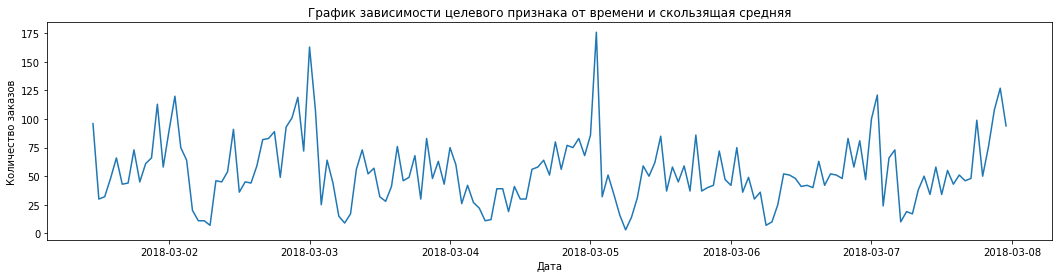

In [22]:
fig, ax = plt.subplots(figsize=(18,4))
ax.plot(data['num_orders'].loc['2018-03':'2018-03-7'])
ax.set_title('График зависимости целевого признака от времени и скользящая средняя')
ax.set_ylabel('Количество заказов')
ax.set_xlabel('Дата')
plt.show()

Наблюдается сильный разброс значений целевого признака в течение дня. Видна четкая сезонность внутри дня: пик в 00:00 часов, спад в утреннее время, и скачкообразный рост к полуночи.

Теперь посмотрим какие закономерности в сезонности и трендах удалось распознать компьютеру:

In [23]:
decomposed = seasonal_decompose(data['num_orders'])

Построим график тренда целевого признака:

Text(0, 0.5, 'Количество заказов')

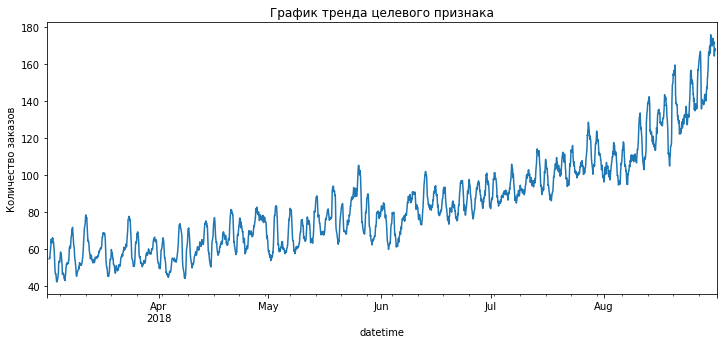

In [24]:
plt.figure(figsize=(12, 5))
decomposed.trend.plot()
plt.title('График тренда целевого признака')
plt.ylabel('Количество заказов')

Количество заказов неуклонно растет! И снова, нам неизвестно, это сезонные годовые колебания или тренд. Полагаем, что **тренд является мультипликативным**, так как график тренда похож на экспоненциальный.

<div class="alert alert-block alert-info"> Мультипликативным ли? В дальнейшем, модель Хольта Уинтерса будет ругаться на нулевые значения при попытке мне явно указать мультипликативность тренда) </div>

Построим график сезонности:

Text(0, 0.5, 'Количество заказов')

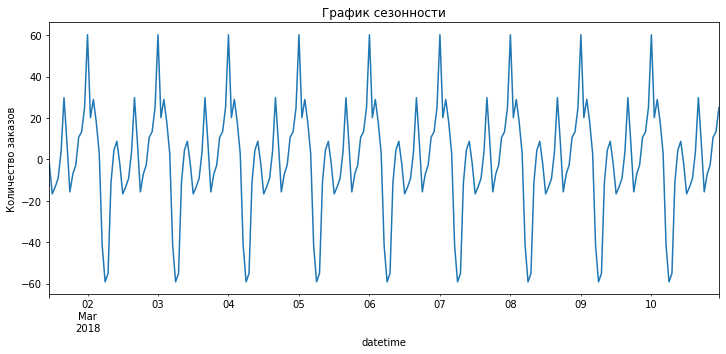

In [25]:
plt.figure(figsize=(12, 5))
decomposed.seasonal['2018-03':'2018-03-10'].plot()
plt.title('График сезонности')
plt.ylabel('Количество заказов')

Сезонность очень ярко выражена. День за днем картина повторяется. Поэтому сезонность у нас выражена в рамках одного дня. Полагаем, что **сезонность - аддитивна.**

<div class="alert alert-block alert-info"> И снова... никак не объяснялось как интерпретировать результаты графика тренда и сезонности. Добавил просто чтобы было. Подскажи пожалуйста, как я могу их использовать?)</div>

### Вывод:

- В данных по количеству заказов сервиса такси - наблюдается тренд на увеличение заказов. Однако неизвестно, это сезонный тренд или постоянный в связи с недостатком данных. 
- Так же, выяснилась сезонность целевого признака в рамках одного дня. Пик в ночное время около 00:00, резкий спад в утренние часы, и новые меньшие пики в течение дня. 

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Молодец)Здесь всё хорошо)
</div>

## Обучение моделей

Прежде чем приступать к обучению, подготовим данные. Отделим фичи от целевого признака, и создадим тестовую выборку:

In [26]:
features = data.drop('num_orders', axis=1)
target = data.num_orders

In [27]:
features_train, features_test, target_train, target_test = train_test_split(features, target, shuffle=False, 
                                                                            test_size=0.1, random_state=42)

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Я так понимаю, что будет использована cv, надеюсь ты не допустил там ошибок)
</div>

Для начала, напишем код для кросс-валидации. Стандартный подход к кросс-валидации мы на временном ряду использовать не можем, так как фолды будут перемешиваться и мы получим утечку целевого признака из будущего. Поэтому воспользуемся стратегией как на картинке ниже:

In [28]:
display(Image(url='https://habrastorage.org/files/f5c/7cd/b39/f5c7cdb39ccd4ba68378ca232d20d864.png'))

In [29]:
def cross_validation1(features, target, model, num_folds, params=None):
    scores = []
    batch = int(np.floor(data.shape[0] / num_folds))
    for i in range(num_folds-1):
        train_features = features.iloc[0:(i+1)*batch]
        test_features = features.iloc[(i+1)*batch+1:(i+1)*batch+batch]
        
        train_target = target.iloc[0:(i+1)*batch]
        test_target = target.iloc[(i+1)*batch+1:(i+1)*batch+batch]
        
        if params != None:
            estimator = GridSearchCV(model, params, scoring='neg_mean_squared_error')
        else:
            estimator = model 
            
        estimator.fit(train_features, train_target)
        
        if params != None:
            best_estimator = estimator.best_estimator_
        else:
            best_estimator = estimator
        
        predictions = best_estimator.predict(test_features)
        
        score = mean_squared_error(test_target, predictions)
        scores.append(score)
        
    # добавляем визуализацию результатов
    plt.figure(figsize=(15, 5))
    plt.plot(predictions[0:500], "r", label="prediction")
    plt.plot(test_target.values[0:500], label="actual")

    plt.legend(loc="best")
    plt.title("Best estimator (first 500 objects) \n Train / test sample shape {} / {} \n Root mean squared error {} orders per hour".format(
            train_features.shape[0], test_features.shape[0], round(np.sqrt(mean_squared_error(predictions, test_target)))))
    plt.grid(True);
    print('Средняя оценка RMSE на кросс-валидации:', np.sqrt(np.mean(scores)))
        
    return best_estimator 

**Модель линейной регрессии**

Средняя оценка RMSE на кросс-валидации: 35.992873252081544


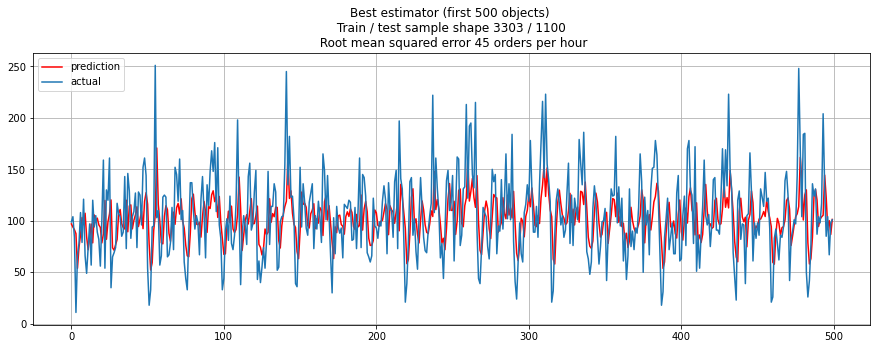

In [30]:
lr = cross_validation1(features, target, LinearRegression(), 4, None)

Видно, что нашей модели удается уловить закономерности в распределении данных. Но она плохо справляется с прогнозированием пиковых значений. Посмотрим на результаты других моделей.

**Модель случайного леса**

Средняя оценка RMSE на кросс-валидации: 37.79674375969295


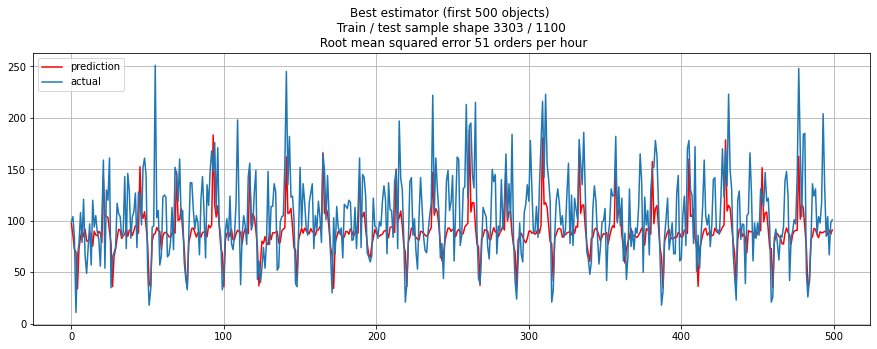

In [31]:
rf = cross_validation1(features, target, RandomForestRegressor(), 4, params={'max_depth':range(3, 6)})

Случайный лес тоже показывает неплохие результаты. Видно, что предсказательная кривая получилась более сглаженной, чем у модели линейной регрессии. Но в целом, закономерности модель уловила. Считаю, что не хватает некоего дополнительного признака(ов), который отвечает за пиковые значения данных.

**Модель Хольта-Уинтерса**

Для ее обучения, нам нужно немножно скорректировать написанную выше функцию кросс-валидации:

In [32]:
def cross_validation_stat_models(target, num_folds):
    scores = []
    batch = int(np.floor(data.shape[0] / num_folds))
    for i in range(1, num_folds):
        train_target = target.iloc[0 : i*batch]
        test_target = target.iloc[i*batch : (i*batch)+batch]
        
        fit1 = ExponentialSmoothing(train_target, seasonal_periods=24, trend='add', seasonal='add', damped_trend=True,
                                ).fit()
        
        predictions = fit1.forecast(len(test_target))
        
        score = mean_squared_error(test_target, predictions)
        scores.append(score)
        
     # добавляем визуализацию результатов
    plt.figure(figsize=(15, 5))
    plt.plot(test_target[0:500], label="actual")
    plt.plot(predictions[0:500], "r", label="prediction")

    plt.legend(loc="best")
    plt.title("Best estimator (first 500 objects) \n Train / test sample shape {} / {} \n Root mean squared error {} orders per hour".format(
    train_target.shape[0], test_target.shape[0], round(np.sqrt(np.mean(scores)))))
    plt.grid(True);
    print('Средняя оценка RMSE на кросс-валидации:', np.sqrt(np.mean(scores)))
        
    return fit1


Средняя оценка RMSE на кросс-валидации: 35.17937396606431


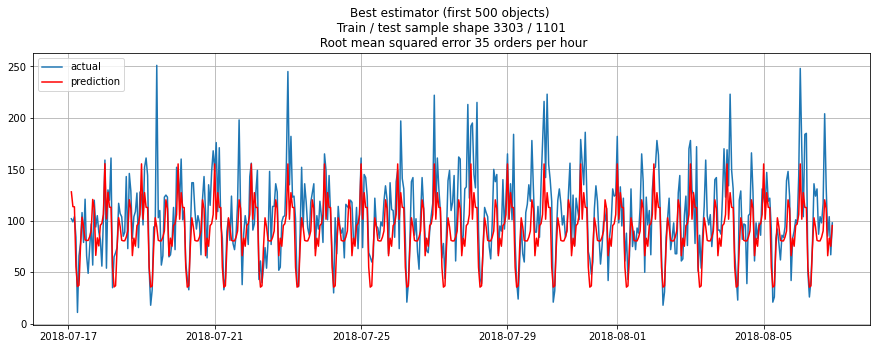

In [33]:
hw = cross_validation_stat_models(data.num_orders, 4)


Модель Хольта-Уинтерса показала наилучший результат. В среднем, ошибка на 35 заказов. Модель достаточно хорошо уловила внутридневную сезонность, но как и предыдущие модели - плохо справляется с прогнозированием пиковых значений.

<div class="alert alert-danger">
    
**Комментарий ревьюера**
    
Кирилл, так делать нельзя, т.к. делая перекрестную проверку будет момент, когда мы будем обучать на будущем, а предсказывать прошлое)Пожалуйста исправь) Либо раздели просто выборку на 3 части, либо воспользуйся методом для временных рядов)
    
P.S. Если есть какие-то вопросы, буду рад ответить) Плюс, принимаются пожелания по доп материалам)
</div>

<div class="alert alert-block alert-info"> Вроде бы исправил. Можно ли такую cv делать стандартными инструментами библиотеки scikitlearn? </div>

## Тестирование моделей

LinearRegression RMSE test score: 52.648


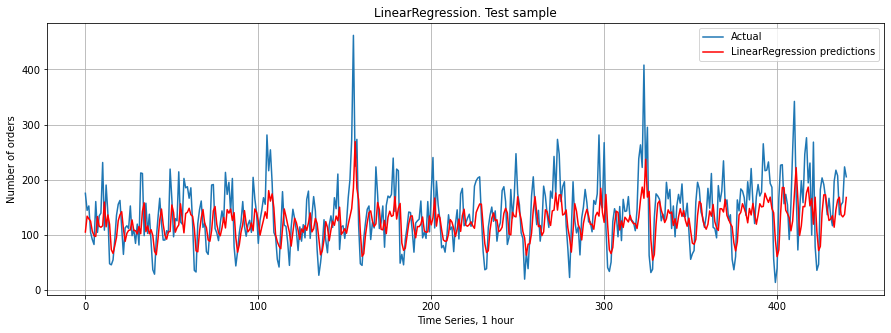

RandomForest RMSE test score: 66.300


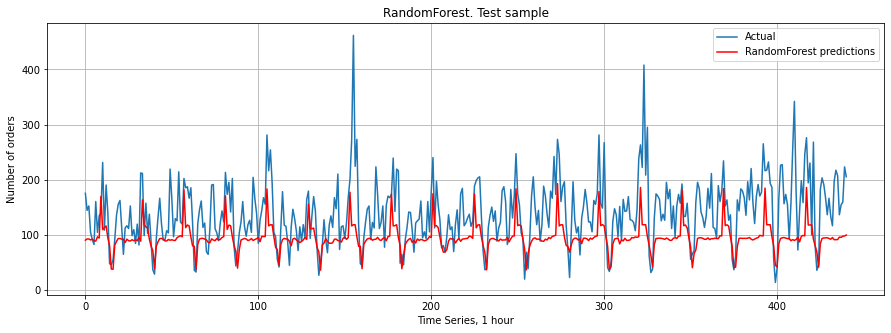

Holt-Winters RMSE test score: 81.532


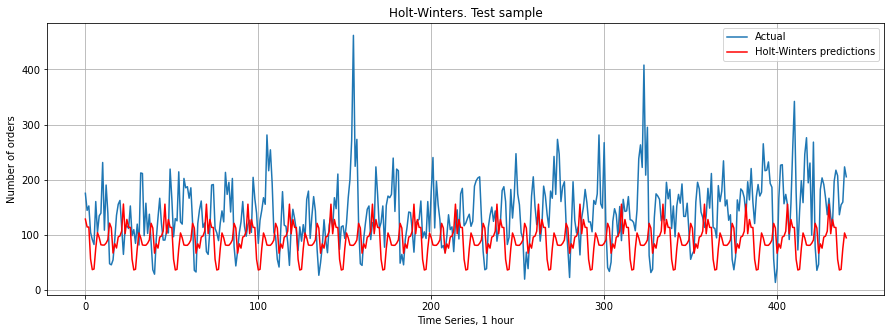

Dummy-model RMSE test score: 58.918


Text(0.5, 0, 'Time Series, 1 hour')

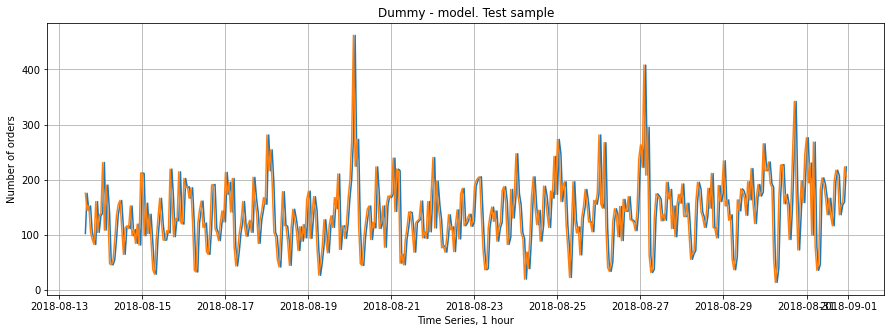

In [34]:
models = {'LinearRegression':lr, 'RandomForest':rf, 'Holt-Winters':hw}

for model_name, model in models.items():
    if model_name != 'Holt-Winters':
        predictions = model.predict(features_test)
        score = np.sqrt(mean_squared_error(target_test, predictions))
    else:
        predictions = model.forecast(len(target_test)).values
        score = np.sqrt(mean_squared_error(target_test, predictions))
    print(model_name, 'RMSE test score: %.3f' %score)
    
    plt.figure(figsize=(15, 5))
    plt.title(model_name + ". Test sample")
    plt.plot(target_test.values, label='Actual')
    plt.plot(predictions, label=model_name+' predictions', c='r')
    plt.legend(loc="best")
    plt.grid(True)
    plt.ylabel('Number of orders')
    plt.xlabel('Time Series, 1 hour')
    plt.show()
    
# Добавляем Dummy модель для проверки моделей на адекватность
dummy_predictions = features_test.lag_1
score = np.sqrt(mean_squared_error(target_test, dummy_predictions))
    
print('Dummy-model RMSE test score: %.3f' %score)
plt.figure(figsize=(15, 5))
plt.title("Dummy - model. Test sample")
plt.plot(dummy_predictions)
plt.plot(target_test)
plt.grid(True)
plt.ylabel('Number of orders')
plt.xlabel('Time Series, 1 hour')


**Вывод:**



Классические, простые модели не смогли обеспечить требуемое качество на тестовой выборке. На текущий момент, лучшей моделью оказалась линейная регрессия, с результатом **MSE = 52.64**. Ей одной удалось превзойти результаты Dummy - модели.

В качестве эксперимента попробуем обучить более приспособленную к задаче временных рядов модель - ARIMA.

<div class="alert alert-block alert-info"> Никак не удается добиться поставленного результата. Подскажи пожалуйста, куда копнуть. Для линейки и деревьев очевидно стоит работать над фичами, для улучшения качества... А вот модели для временных рядов не так просты. Очевидно, что они способны на гораздо лучшие результаты... Куда у них смотреть? </div>

**Экспериментальная модель ARIMA**

In [35]:
#!pip install pmdarima

ARIMA - достаточно громоздкая в вычислительном плане модель, и высокой скоростью обучения не отличается. Плюс ко всему, она предсказывает всего одно значение, а не целый массив. Отчего скорость работы с ней еще больше увеличивается. Поэтому, оценим качество модели на небольшом массиве данных. Скажем 10% тестовой выбрки. И если результат окажется обнадеживающим, продолжим предсказание уже полной выборки. Приступим:

Помним, что в модель нужно передать параметры p, d, q. Наш временной ряд достаточно простой, отчего посмотрев на [график автокорреляции](#autocorr) принимаем p = 2. Так как наш временной ряд является стационарным, d принимаем равным 0.

Для определения q - посмотрим на график автокоррелиции:

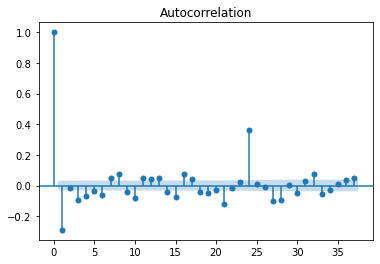

In [36]:
diff = data.num_orders.diff().dropna()

plot_acf(diff);

Стоит приять q = 1, но после запуска обучения, такая модель подгоняется слишком долго, поэтому, для увеличения скорости, примем q=0.

Теперь строим обучаем модель с подобранными параметрами, и оценим качество на первых 10% объектов тестовой выборки:

ARIMA RMSE test score: 72.411


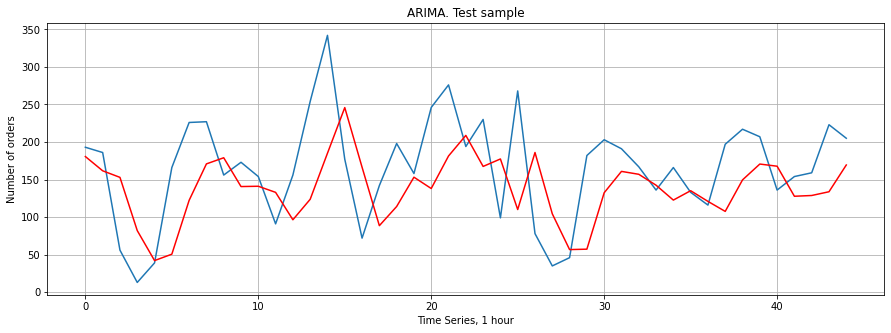

In [37]:
size = int(len(data.num_orders) * 0.99)
train, test = data.num_orders[0:size], data.num_orders[size:len(data.num_orders)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print(t, 'predicted=%f, expected=%f' % (yhat, obs))
error = np.sqrt(mean_squared_error(test, predictions))
print('ARIMA RMSE test score: %.3f' % error)
plt.figure(figsize=(15, 5))
plt.title("ARIMA. Test sample")
plt.plot(test.values)
plt.plot(predictions, color='red')
plt.ylabel('Number of orders')
plt.xlabel('Time Series, 1 hour')
plt.grid(True)
plt.show()


**Вывод:**

ARIMA тоже не показала значения качества даже близкого к требуемому. Возможно, стоило перебрать бОльшее количество параметров "по сетке". Но вычислительная сложность такой модели возрасла бы многократно.

## Общий вывод

Ни одна из трех протестированных моделей не показала требуемого качества. Лучший результат у линейной регрессии. Ее RMSE = 52.648. Модель линейной регрессии лучше улавливает тренды, и "выглядит умнее" остальных. Тест на адекватность прощла только она.

Что удивительно, наилучшие результаты все модели показывают обучаясь на меньшем количестве данных. То есть, при размере тренировочной выборки в 1100 объектов, модели показывают более хорошие результаты, нежели когда мы обучаемся на 3300 объектах. Возможно, есть причина в актуальности данных, и данные их прошлого привносят только лишний шум. 

На удивление, специализированные модели для временных рядов оказались на порядок хуже гораздо более универсальных и простых моделей: случайного леса и линейной регрессии. Более чем вероятно, что специализированные модели требуют некоего иного подхода к обучению, отчего тогда их качество возможно вырастет.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48